In [1]:
#웹 크롤링
import requests
from bs4 import BeautifulSoup

url = "https://www.hani.co.kr/arti/list.html?sec=news&subsec=politics"
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")
titles = soup.find_all("h4", class_="article-title")
for title in titles:
    print(title.text.strip())


서울백병원 문 닫으면? 중구보건소 “도심 응급의료 공백 우려”
[속보]이규민 교육과정평가원장 “6월 모의평가 책임지고 사임”
당정 “수능에서 킬러 문항 배제… 자사고·외고·국제고는 존치”
평범한 우리도, 세상을 바꿀 수 있다
인간중심 간호 전문인재 양성…‘국시 100% 합격’
뜨겁다 뜨거워…폭염에도 삶은 계속되고, 방법은 다 있다
낮에 모인 ‘육퇴’ 동지들 “엄마가 행복해야 아이도 행복하다”
“오래된 물건 자랑하랬더니, 엄마아빠 쓰던 연필깎이 갖고 와”
‘오징어 게임 2’ 캐스팅 영상에 여성 0…넷플릭스에 물어보니
‘킬러 문항→사교육비→저출산’ 윤 대통령의 문제의식 배경
대안학교 가려면 지금부터 ‘발품’…2박3일 면접 보는 곳도
경기부양 욕심이 키운 ‘카드대란’ 연착륙에 성공하다
14살 스페이스X 신입사원 “채용 때 나이 편견 버리길 희망”
파업 유발시킨 ‘회사 불법’ 방치한 대법 판결…노란봉투법이 답이다
스위스, 법인세율 최저 11→15%로…국민투표 78.5% 찬성


In [35]:
# 다음 영화 예매 순위 정보
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://movie.daum.net/ranking/reservation'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

ol = soup.select_one('.list_movieranking')
li_list = ol.find_all('li')

movie = []

for li in li_list:
    rank = li.select_one('.rank_num').text
    name = li.select_one('.link_txt').text
    see = li.select_one('.ico_see').text
    grade = li.select_one('.txt_grade').text
    num = li.select_one('.txt_num').text[:-1]
    mvdate = li.select_one('.txt_info > .txt_num').text
    movie.append([rank, name, see, grade, num, mvdate])

df = pd.DataFrame(movie, columns=['순위', '영화명', '관람가', '평점', '예매율', '개봉일'])

df.to_csv('movie_info.csv', index=False, encoding='cp949')

df = pd.read_csv('movie_info.csv', encoding='cp949')
df.sort_values('평점', ascending=False)

df['개봉일'] = pd.to_datetime(df['개봉일'], format="%y.%m.%d")
df.head()

# rank_list = soup.select('.tit_item > a')
# rank_rate = soup.select('span.txt_append > span > span')

# for rank, title in enumerate(rank_list, 1):
#     print(f'{rank}위: {title.text} 예매율({rank_rate[rank-1].text})')


,순위,영화명,관람가,평점,예매율,개봉일
0,1,스파이더맨: 어크로스 더 유니버스,전체관람가,8.9,26.4,2023-06-21
1,2,귀공자,청소년관람불가,8.6,21.0,2023-06-21
2,3,엘리멘탈,전체관람가,8.8,16.0,2023-06-14
3,4,범죄도시3,15세이상관람가,6.7,13.1,2023-05-31
4,5,플래시,12세이상관람가,8.0,6.6,2023-06-14


## 과제
1. 웹크롤링
2. csv파일을 이용한 데이터 분석(전처리, 그래프)

두가지 합쳐서 해도 됨

    전국의 맛집 정보 추출하기 + 이미지 포함


'<html lang="ko"><head>\n  <meta charset="utf-8">\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">\n  <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=no">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <link rel="shortcut icon" type="image/x-icon" href="/favicon.ico?1.6.33">\n  <link rel="apple-touch-icon" href="/favicon.ico?1.6.33">\n\n  <meta http-equiv="cache-control" content="max-age=3540">\n\n  <title>\'서울 종로구 배달\' 맛집 빅데이터 추천순위 Top100 - 다이닝코드</title>\n  \n  <meta name="keywords" content="다이닝코드, diningcode">\n  \n  <link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.diningcode.com//list.dc?keyword=%EB%B0%B0%EB%8B%AC&amp;addr=%EC%84%9C%EC%9A%B8+%EC%A2%85%EB%A1%9C%EA%B5%AC">\n  <meta http-equiv="imagetoolbar" content="no">\n  <meta name="format-detection" content="telephone=yes, address=yes, email=yes">\n\n  <meta content="1 Days" name="revisit-
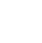
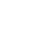
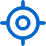

In [19]:
from selenium import webdriver
from selenium.webdriver.support.select import Select
#from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

#맛집 데이터 크롤링
print("=" *50)
print("    전국의 맛집 정보 추출하기 + 이미지 포함")
print("=" *50)

#지역 입력
trial = input('''
    1. 서울  2. 강원  3. 경기  4. 경남  5. 경북  6. 광주
    7. 대구  8. 대전  9. 부산  10.세종  11.울산  12.인천
    13.전남  14.전북  15.제주  16.충남  17.충북
    
    위 지역 중 자료를 수집할 지역의 이름을 적어주세요~ 
    전체 지역의 자료를 수집하고 싶으시면 빈칸으로 엔터 ㄱㄱ
    ''')

#시군구 입력
if trial == '서울':
    city = input('''
    종로구      중구        용산구      성동구      광진구      동대문구
    중랑구      성북구      강북구      도봉구      노원구      은평구  
    서대문구    마포구      양천구      강서구      구로구      금천구
    영등포구    동작구      관악구      서초구      강남구      송파구
    강동구
    
    위 서울 지역 중 자료를 수집할 시군구를 적어주세요~
    서울 전체 지역의 자료를 수집하고 싶으시면 빈칸으로 엔터 ㄱㄱ
    ''')
elif trial == '강원':
    city = input('''
    강릉시      고성군      동해시      삼척시      속초시      양구군
    양양군      영월군      원주시      인제군      정선군      철원군
    춘천시      태백군      평창군      홍천군      화천군      횡성군
    
    위 강원 지역 중 자료를 수집할 시군구를 적어주세요~
    강원 전체 지역의 자료를 수집하고 싶으시면 빈칸으로 엔터 ㄱㄱ
    ''')
elif trial == '경기':
    city = input('''
    가평군          고양시          고양시 덕양구       고양시 일산동구      고양시 일산서구
    과천시          광명시          광주시              구리시               군포시
    김포시          남양주시        동두천시            부천시               성남시
    성남시 분당구   성남시 수정구   성남시 중원구       수원시               수원시 권선구
    수원시 영통구   수원시 장안구   수원시 팔달구       시흥시               안산시
    안산시 단원구   안산시 상록구   안성시              안양시               안양시 동안구
    안양시 만안구   양주시          양평군              여주시               연천군
    오산시          용인시          용인시 기흥구       용인시 수지구        용인시 처인구
    의왕시          의정부시        이천시              파주시               평택시
    포천시          하남시          화성시
    
    위 경기 지역 중 자료를 수집할 시군구를 적어주세요~
    경기 전체 지역의 자료를 수집하고 싶으시면 빈칸으로 엔터 ㄱㄱ
    ''')

#카테고리 입력
category = input('''
    배달        밥집        카페        술집        고깃집      횟집
    한식        중식        일식        양식        아시안      멕시칸
    이탈리안    프렌치      뷔페        브런치      패스트푸드  분식
    국물요리    면요리      해산물    
    
    위 카테고리 중 자료를 수집할 카테고리를 적어주세요~
    카테고리 전체 지역의 자료를 수집하고 싶으시면 빈칸으로 엔터 ㄱㄱ
    ''')

# 크롬 브라우저 실행
path = "chromedriver.exe"
url = 'https://www.diningcode.com/list.dc?addr=' + trial + '%20' + city +'&keyword=' +category
#driver = webdriver.Chrome(ChromeDriverManager().install())
driver = webdriver.Chrome(path)
driver.get(url)

# 스크롤 다운
def scroll_down(driver):
    #driver.execute_script("window.scrollBy(0,document.body.scrollHeight);")
    driver.execute_script("window.scrollBy(0,9300);")
    time.sleep(1)

scroll_down(driver)

#select_date = Select(driver.find_elements_by_xpath('/html/body/div/div[2]/div[2]/div[3]/form/div/div[1]/div/select'))
#search_loc = 
html = driver.page_source
html

#element = driver.find_element_by_class_name(".sc-cPtzYu sc-BCEsf djeqSE fisGqK").click()
#element.click()


#soup = BeautifulSoup(response.text, 'html.parser')

#ol = soup.select_one('.layout-line')

#li_list = ol.find_all('li')